## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Exploreing the data

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Unnamed: 0,Kyphosis,Age,Number,Start
0,1,absent,71,3,5
1,2,absent,158,3,14
2,3,present,128,4,5
3,4,absent,2,5,1
4,5,absent,1,4,15


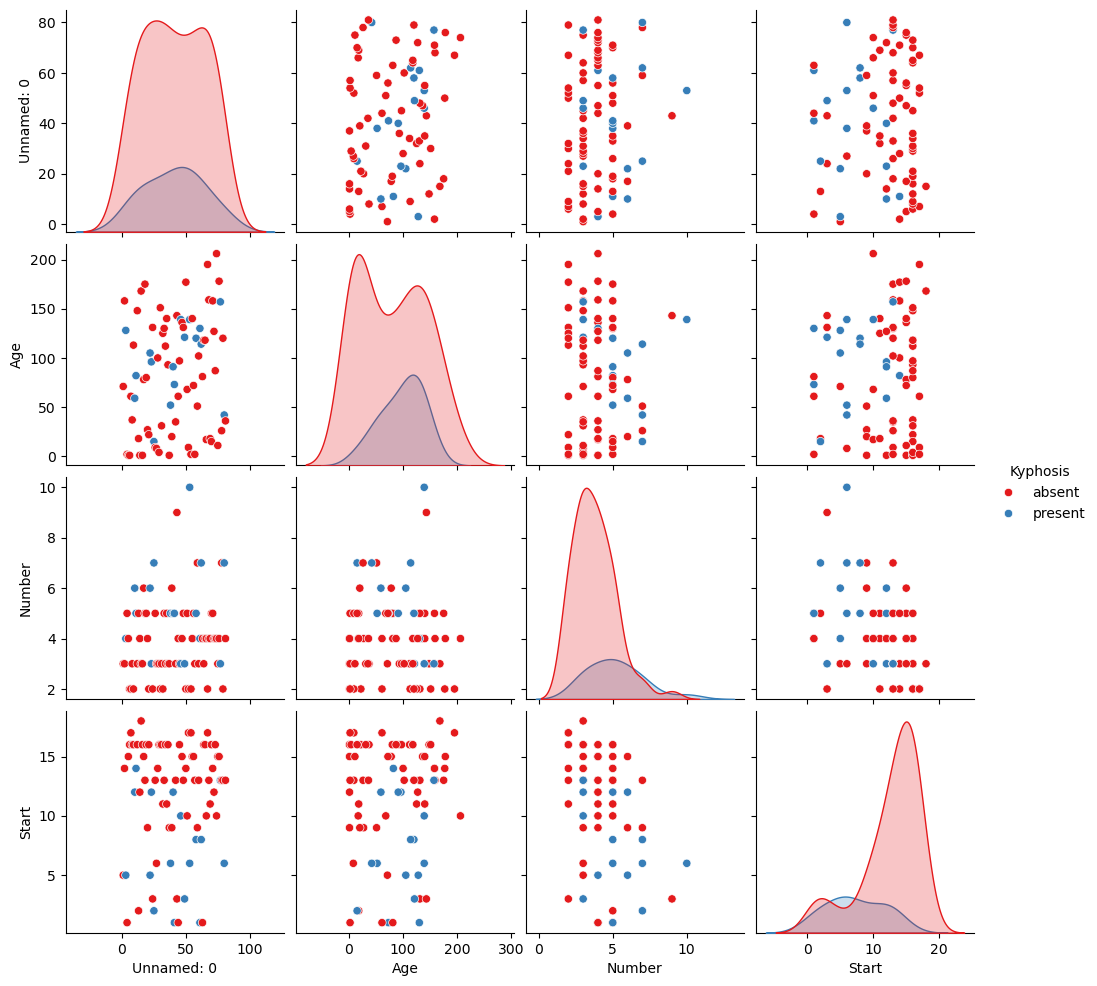

In [4]:
sns.pairplot(df, hue = 'Kyphosis', palette ='Set1' )

### Train Test Split

In [5]:
from sklearn.model_selection import train_test_split

In [39]:
X = df.drop(df.columns[0], axis=1)

In [38]:
X

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [58]:
y = df['Kyphosis'].map({'present': 1, 'absent': 0})
y = patsy.dmatrix("0 + C(Kyphosis, Treatment('absent'))", data=df, return_type='matrix')


In [59]:
y

DesignMatrix with shape (81, 2)
  Columns:
    ["C(Kyphosis, Treatment('absent'))[absent]",
     "C(Kyphosis, Treatment('absent'))[present]"]
  Terms:
    "C(Kyphosis, Treatment('absent'))" (columns 0:2)
  (to view full data, use np.asarray(this_obj))

## Test Train Split

In [60]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 0.30)

In [61]:
X_train.shape

(56, 4)

In [62]:
y_train.shape

(56, 2)

## Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier


In [64]:
dtree = DecisionTreeClassifier()

In [65]:
dtree.fit(X_train, y_train)

ValueError: could not convert string to float: 'absent'

#Predict and Evaluate

In [16]:
predictions = dtree.predict(X_test)

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

In [18]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.85      0.85      0.85        20
     present       0.40      0.40      0.40         5

    accuracy                           0.76        25
   macro avg       0.62      0.62      0.62        25
weighted avg       0.76      0.76      0.76        25



In [19]:
print(confusion_matrix(y_test,predictions))

[[17  3]
 [ 3  2]]


## Bagging Classifier

In [20]:
from sklearn.ensemble import BaggingClassifier

In [21]:
bag = BaggingClassifier(dtree, n_estimators=100, max_samples=0.8, random_state=1)

In [22]:
bag.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, random_state=1)

In [23]:
predictions_bag = bag.predict(X_test)

In [24]:
print(classification_report(y_test,predictions_bag))

              precision    recall  f1-score   support

      absent       0.86      0.95      0.90        20
     present       0.67      0.40      0.50         5

    accuracy                           0.84        25
   macro avg       0.77      0.68      0.70        25
weighted avg       0.82      0.84      0.82        25



In [25]:
print(confusion_matrix(y_test,predictions_bag))

[[19  1]
 [ 3  2]]


## Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
rfc_pred = rfc.predict(X_test)

In [28]:
print(confusion_matrix(y_test,rfc_pred))

[[19  1]
 [ 4  1]]


In [29]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.83      0.95      0.88        20
     present       0.50      0.20      0.29         5

    accuracy                           0.80        25
   macro avg       0.66      0.57      0.58        25
weighted avg       0.76      0.80      0.76        25



#Visualization

In [30]:
from IPython.display import Image  
from io import StringIO 
from sklearn.tree import export_graphviz
import pydot 

In [31]:
features = list(df.columns[1:])
features

['Kyphosis', 'Age', 'Number', 'Start']

In [32]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

FileNotFoundError: [Errno 2] "dot" not found in path.